In [1]:
using Revise, Dates, DataFrames, ExcelFiles, Plots, CSV, Statistics
using ReproductionNumbers

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise C:\Users\bened\.julia\packages\Revise\jVsKo\src\Revise.jl:1167


In [2]:
case_name   =   "estimated-cases-20200511"
file_name   =   "data/COVID19_Deutschland.xlsx"
sheet_name  =   "Nowcast_R"
days_col    =   "Datum RKI-Tagesbericht"
data_col    =   "N(RKI-H)"

"N(RKI-H)"

In [3]:

function mae(pred::Vector, gt::CSV.Column{Float64,Float64})
   mean(abs.(pred - gt))
end


mae (generic function with 1 method)

# Estimated reproduction number on COVID-19 Dataset

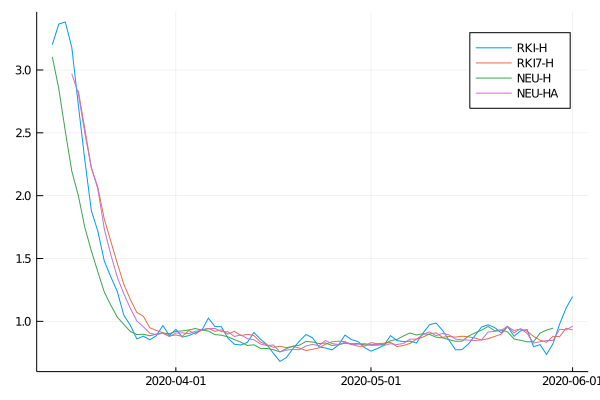

In [4]:
k_gen = 4
df = DataFrame(load(file_name, sheet_name))
df_cases = get_reference_data(df, days_col = days_col, data_col = data_col, kind = "cases")
rki_h_N, rki_h_R = build_R(df_cases, k_gen - 1, 0, k_gen)
rki7_h_N, rki7_h_R = build_R(df_cases, 7, 0, k_gen)
neu_h_N, neu_h_R = build_R(df_cases,k_gen - 1, 3, k_gen)
neu_ha_N, neu_ha_R = build_R_acausal(df_cases, Day(k_gen - 1), Day(3),  Day(k_gen))


gr()
plot(rki_h_R.days, rki_h_R.R, label="RKI-H")
plot!(rki7_h_R.days, rki7_h_R.R, label="RKI7-H")
plot!(neu_h_R.days, neu_h_R.R, label="NEU-H")
plot!(neu_ha_R.days, neu_ha_R.R, label="NEU-HA")
#savefig("original_data.tex")

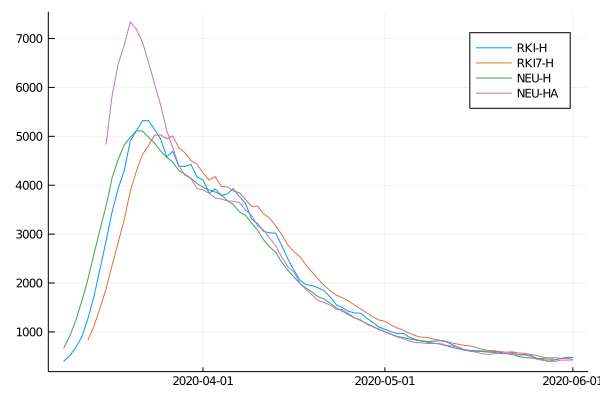

In [5]:
plot(rki_h_N.days, rki_h_N.cases, label="RKI-H")
plot!(rki7_h_N.days, rki7_h_N.cases, label="RKI7-H")
plot!(neu_h_N.days, neu_h_N.cases, label="NEU-H")
plot!(neu_ha_N.days, neu_ha_N.cases, label="NEU-HA")


## No delay pattern

Evaluation of the estimators on a dataset without delay patterns

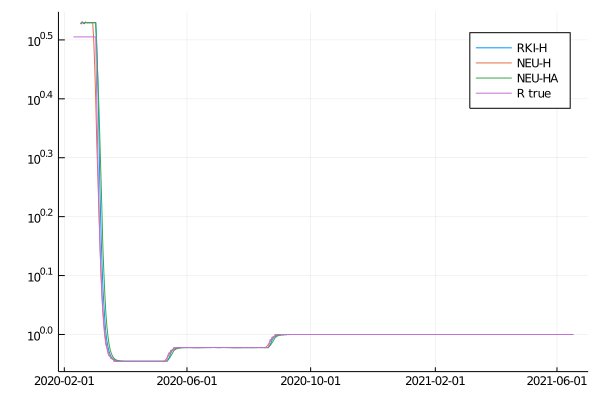

In [6]:
df = CSV.read("data/synth_0.9_0.95_1_day.csv")
r_true = df[!, "true R"]
index = map(x -> Date(2020,2,3) + Day(x), df[!, "k"])
cases = df[!, "New cases (True)"]
df_cases = get_data(df, days_col = "k", data_col = "New cases (True)", kind = "cases")
df_cases.days = map(x -> Date(2020,2,3) + Day(x), df_cases.days)
rki_h_N, rki_h_R = build_R(df_cases, k_gen - 1, 0, k_gen)
neu_h_N, neu_h_R = build_R(df_cases, k_gen - 1, 3, k_gen)
neu_ha_N, neu_ha_R = build_R_acausal(df_cases, k_gen - 1, 3, k_gen)

gr()
plot(rki_h_R.days, rki_h_R.R, label="RKI-H", yscale=:log10)
plot!(neu_h_R.days, neu_h_R.R, label="NEU-H", yscale=:log10)
plot!(neu_ha_R.days, neu_ha_R.R, label="NEU-HA", yscale=:log10)
plot!(index, r_true, label="R true", yscale=:log10)


In [7]:
typeof(df_cases.days) == Vector{Date}

true

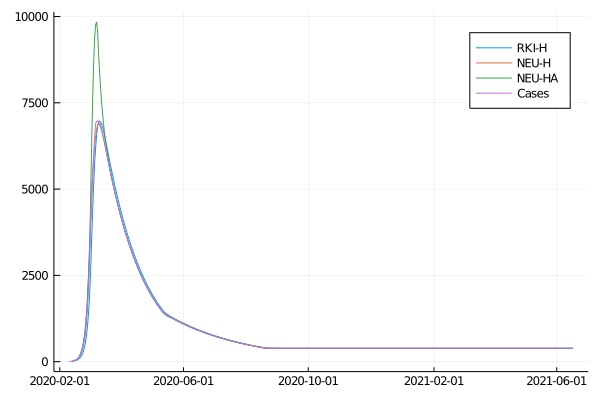

In [8]:
gr()
plot(rki_h_N.days, rki_h_N.cases, label="RKI-H")
plot!(neu_h_N.days, neu_h_N.cases, label="NEU-H")
plot!(neu_ha_N.days, neu_ha_N.cases, label="NEU-HA")
plot!(index, cases, label="Cases")

## Delayed by 10

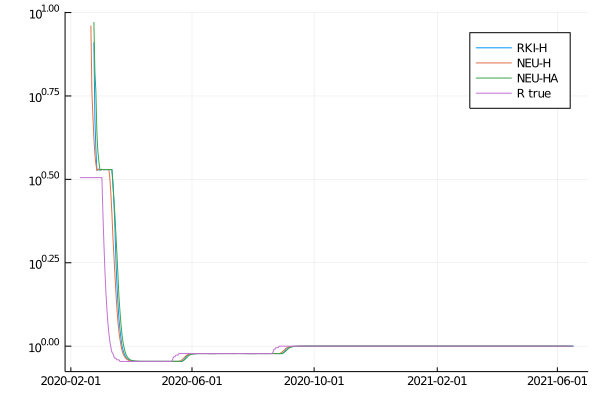

In [9]:
df_cases = get_data(df, days_col = "k", data_col = "reported cases", kind = "cases")
df_cases.days = map(x -> Date(2020,2,3) + Day(x), df_cases.days)
rki_h_N, rki_h_R = build_R(df_cases, k_gen - 1, 0, k_gen)
neu_h_N, neu_h_R = build_R(df_cases, k_gen - 1, 3, k_gen)
neu_ha_N, neu_ha_R = build_R_acausal(df_cases, k_gen - 1, 3, k_gen)
gr()

plot(rki_h_R.days, rki_h_R.R, label="RKI-H", yscale=:log10)
plot!(neu_h_R.days, neu_h_R.R, label="NEU-H", yscale=:log10)
plot!(neu_ha_R.days, neu_ha_R.R, label="NEU-HA", yscale=:log10)
plot!(index, r_true, label="R true", yscale=:log10)

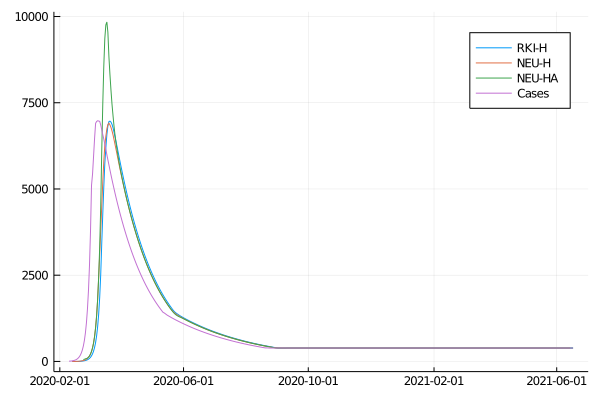

In [10]:
plot(rki_h_N.days, rki_h_N.cases, label="RKI-H")
plot!(neu_h_N.days, neu_h_N.cases, label="NEU-H")
plot!(neu_ha_N.days, neu_ha_N.cases, label="NEU-HA")
plot!(index, cases, label="Cases")

## 1 Day delay pattern

Evaluation on synthetic dataset with one day delay structure and some cutouts

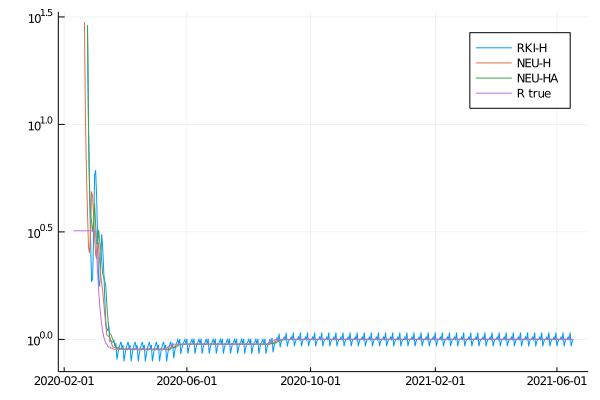

In [11]:
df_cases = get_data(df, days_col = "k", data_col = "delayed", kind = "cases")
df_cases.days = map(x -> Date(2020,2,3) + Day(x), df_cases.days)
rki_h_N, rki_h_R = build_R(df_cases, k_gen - 1, 0, k_gen)
neu_h_N, neu_h_R = build_R(df_cases, k_gen - 1, 3, k_gen)
neu_ha_N, neu_ha_R = build_R_acausal(df_cases, k_gen - 1, 3, k_gen)
gr()
plot(rki_h_R.days, rki_h_R.R, label="RKI-H", yscale=:log10)
plot!(neu_h_R.days, neu_h_R.R, label="NEU-H", yscale=:log10)
plot!(neu_ha_R.days, neu_ha_R.R, label="NEU-HA", yscale=:log10)
plot!(index, r_true, label="R true", yscale=:log10)


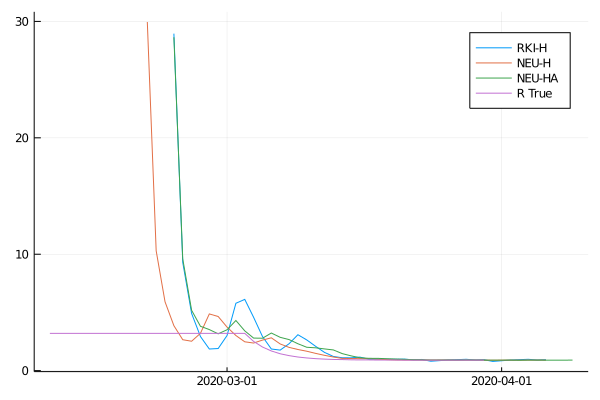

In [12]:
gr()
plot(rki_h_R.days[1:50], rki_h_R.R[1:50], label="RKI-H")
plot!(neu_h_R.days[1:50], neu_h_R.R[1:50], label="NEU-H")
plot!(neu_ha_R.days[1:50], neu_ha_R.R[1:50], label="NEU-HA")
plot!(index[1:50], r_true[1:50], label="R True")

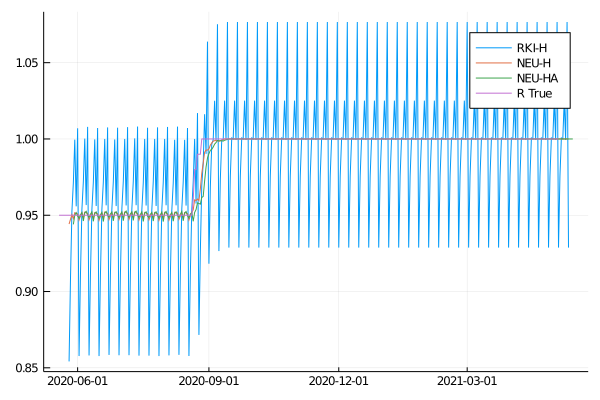

In [13]:
gr()
plot(rki_h_R.days[100:450], rki_h_R.R[100:450], label="RKI-H")
plot!(neu_h_R.days[100:450], neu_h_R.R[100:450], label="NEU-H")
plot!(neu_ha_R.days[100:450], neu_ha_R.R[100:450], label="NEU-HA")
plot!(index[100:450], r_true[100:450], label="R True")

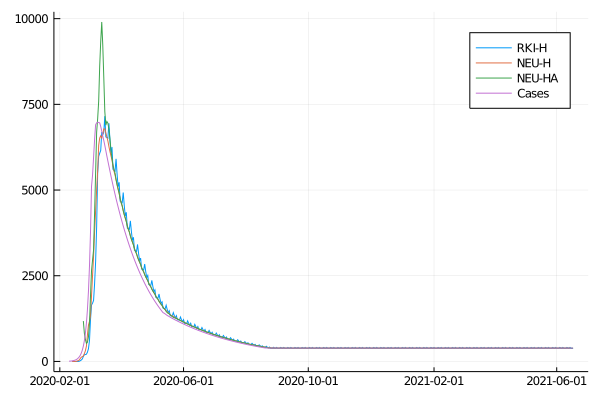

In [14]:
gr()
plot(rki_h_N.days, rki_h_N.cases, label="RKI-H")
plot!(neu_h_N.days, neu_h_N.cases, label="NEU-H")
plot!(neu_ha_N.days, neu_ha_N.cases, label="NEU-HA")
plot!(index, cases, label="Cases")

In [15]:
result = parameter_search(df, collect(1:5), collect(1:5),  collect(1:9), "delayed")
result

,NEUH,NEUHA,Past,Future,k_gen
,Float64,Float64,Int64,Int64,Int64
1,0.114017,0.269615,1,1,1
2,0.102032,1.09208,1,1,2
3,0.089779,0.192811,1,2,2
4,0.0877294,0.637003,2,1,2
5,0.119385,0.192008,2,2,2
6,0.112142,1.03454,1,1,3
7,0.0972421,0.473655,1,2,3
8,0.0963494,0.167198,1,3,3
9,0.0958705,0.816823,2,1,3


# 2-Day Delay pattern

In [16]:
df = CSV.read("data/synth_0.9_0.95_1_2day.csv")
df_cases = get_data(df, days_col = "k", data_col = "delayed", kind = "cases")
df_cases.days = map(x -> DateTime(2020,2,3) + Day(x), df_cases.days)
rki_h_N, rki_h_R = build_R(df_cases, k_gen - 1, 0, k_gen)
neu_h_N, neu_h_R = build_R(df_cases, k_gen - 1, 3, k_gen)
neu_ha_N, neu_ha_R = build_R_acausal(df_cases, k_gen - 1, 3, k_gen)
gr()
plot(rki_h_R.days, rki_h_R.R, label="RKI-H", yscale=:log10)
plot!(neu_h_R.days, neu_h_R.R, label="NEU-H", yscale=:log10)
plot!(neu_ha_R.days, neu_ha_R.R, label="NEU-HA", yscale=:log10)
plot!(index, r_true, label="R true", yscale=:log10)


AssertionError: AssertionError: Column `days` of df_cases  needs to have `Date` entries

In [17]:
result = parameter_search(df, collect(1:10), collect(1:10),  collect(1:10), "delayed")
result

,NEUH,NEUHA,Past,Future,k_gen
,Float64,Float64,Int64,Int64,Int64
1,0.121719,0.523941,1,1,1
2,0.0982314,0.749487,1,1,2
3,0.0864459,0.197179,1,2,2
4,0.0839311,0.418738,2,1,2
5,0.0870856,0.144593,2,2,2
6,0.140915,0.639523,1,1,3
7,0.117473,0.43487,1,2,3
8,0.0894307,0.152835,1,3,3
9,0.11522,0.547448,2,1,3


# Weekend Delay Pattern

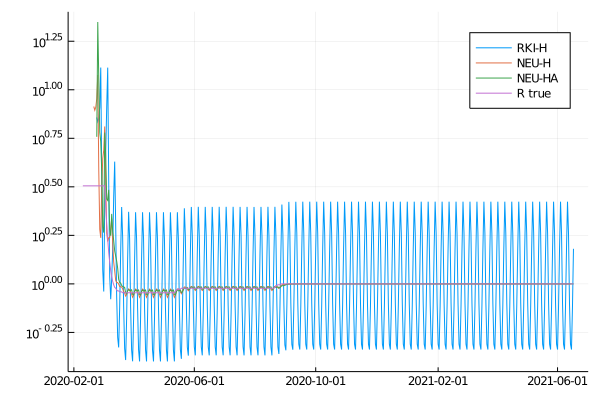

In [18]:
df = CSV.read("data/synth_0.9_0.95_1_weekend.csv")
df_cases = get_data(df, days_col = "k", data_col = "delayed", kind = "cases")
df_cases.days = map(x -> Date(2020,2,3) + Day(x), df_cases.days)

rki_h_N, rki_h_R = build_R(df_cases,k_gen - 1, 0, k_gen)
neu_h_N, neu_h_R = build_R(df_cases,k_gen - 1, 3, k_gen)
neu_ha_N, neu_ha_R = build_R_acausal(df_cases, k_gen - 1, 3, k_gen)
gr()
plot(rki_h_R.days, rki_h_R.R, label="RKI-H", yscale=:log10)
plot!(neu_h_R.days, neu_h_R.R, label="NEU-H", yscale=:log10)
plot!(neu_ha_R.days, neu_ha_R.R, label="NEU-HA", yscale=:log10)
plot!(index, r_true, label="R true", yscale=:log10)


# Real delay pattern

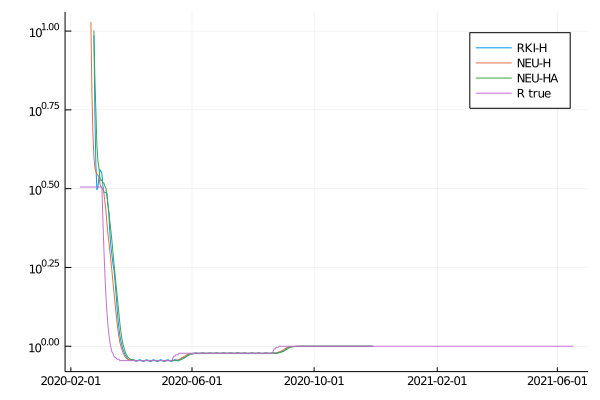

In [19]:
df = CSV.read("data/synth_german_0.9_0.95_1_real_delay.csv")
df_cases = get_data(df, days_col = "k", data_col = "delayed", kind = "cases")
df_cases.days = map(x -> Date(2020,2,3) + Day(x), df_cases.days)

rki_h_N, rki_h_R = build_R(df_cases,k_gen - 1,  0,k_gen)
neu_h_N, neu_h_R = build_R(df_cases,k_gen - 1,  3, k_gen)
neu_ha_N, neu_ha_R = build_R_acausal(df_cases, k_gen - 1, 3, k_gen)
gr()
plot(rki_h_R.days, rki_h_R.R, label="RKI-H", yscale=:log10)
plot!(neu_h_R.days, neu_h_R.R, label="NEU-H", yscale=:log10)
plot!(neu_ha_R.days, neu_ha_R.R, label="NEU-HA", yscale=:log10)
plot!(index, r_true, label="R true", yscale=:log10)


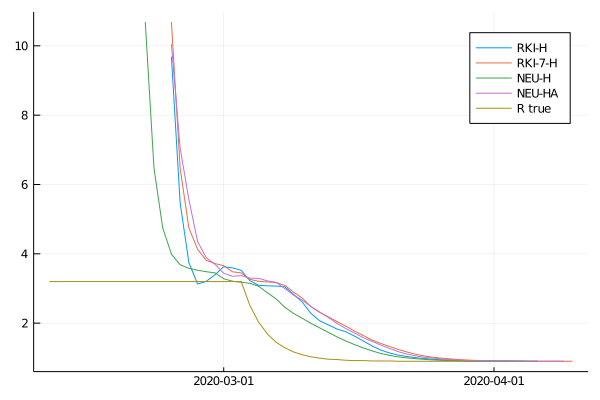

In [20]:
df = CSV.read("data/synth_german_0.9_0.95_1_real_delay.csv")
df_cases = get_data(df, days_col = "k", data_col = "delayed", kind = "cases")
df_cases.days = map(x -> Date(2020,2,3) + Day(x), df_cases.days)
rki_h_N, rki_h_R = build_R(df_cases, k_gen - 1, 0, k_gen)
rki7_h_N, rki7_h_R = build_R(df_cases, 7,  0, k_gen)
neu_h_N, neu_h_R = build_R(df_cases, k_gen - 1,  3, k_gen)
neu_ha_N, neu_ha_R = build_R_acausal(df_cases, k_gen - 1, 3, k_gen)

plot(rki_h_R.days[1:50], rki_h_R.R[1:50], label="RKI-H")
plot!(rki7_h_R.days[1:50], rki7_h_R.R[1:50], label="RKI-7-H")
plot!(neu_h_R.days[1:50], neu_h_R.R[1:50], label="NEU-H")
plot!(neu_ha_R.days[1:50], neu_ha_R.R[1:50], label="NEU-HA")
plot!(index[1:50], r_true[1:50], label="R true")


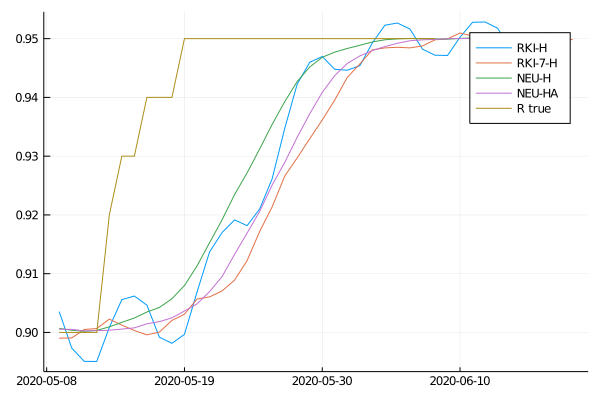

In [21]:
plot(rki_h_R.days[(90 - 7):120], rki_h_R.R[(90 - 7):120], label="RKI-H")
plot!(rki7_h_R.days[(90 - 11):120], rki7_h_R.R[(90 - 11):120], label="RKI-7-H")
plot!(neu_h_R.days[(90 -7):120], neu_h_R.R[(90 - 7):120], label="NEU-H")
plot!(neu_ha_R.days[(90 - 10):120], neu_ha_R.R[(90 - 10):120], label="NEU-HA")
plot!(index[90:120], r_true[90:120], label="R true")


### Calculate MAE

In [22]:
r_true = df[!, "true R"]
index = df[!, "k"]
cases = df[!, "New cases (True)"]
mean(abs.(neu_ha_R.R[9:length(neu_ha_R.R)] .- r_true[19:length(r_true)]))

0.08335311506860398

In [23]:
mean(abs.(rki_h_R.R[12:length(rki_h_R.R)] .- r_true[19:length(r_true)]))

0.07384580189702468

In [24]:
mean(abs.(rki7_h_R.R[8:length(rki7_h_R.R)] .- r_true[19:length(r_true)]))

0.0880483288583705

In [25]:
mean(abs.(neu_h_R.R[12:length(neu_h_R.R)] .- r_true[19:length(r_true) - 3]))

0.05422584016815678

### Calculate rolling MAE

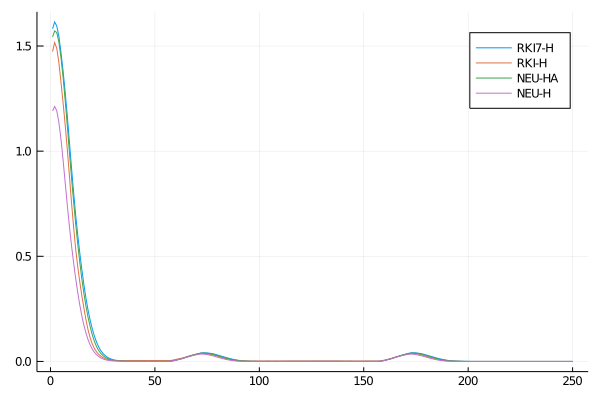

In [26]:
rolling_mae_rki7 = DataFrame(k = Int[], moving_mae = Float64[])
rolling_mae_rki= DataFrame(k = Int[], moving_mae = Float64[])
rolling_mae_neu_ha= DataFrame(k = Int[], moving_mae = Float64[])
rolling_mae_neu_h= DataFrame(k = Int[], moving_mae = Float64[])
window = 14
for i = 1:250
    push!(rolling_mae_rki, [i, mean(abs.(rki_h_R.R[(12+ i):(12+ i +window)] .- r_true[(22+ i): (22 + i + window)]))])
    push!(rolling_mae_neu_ha , [i, mean(abs.(neu_ha_R.R[(9+ i):(9+ i +window)] .- r_true[(22+ i): (22 + i + window)]))])
    push!(rolling_mae_rki7, [i, mean(abs.(rki7_h_R.R[(8+ i):(8+ i +window)] .- r_true[(22+ i): (22 + i + window)]))])
    push!(rolling_mae_neu_h, [i, mean(abs.(neu_h_R.R[(12+ i):(12+ i +window)] .- r_true[(22+ i): (22 + i + window)]))])
end
gr()
plot(rolling_mae_rki7.k, rolling_mae_rki7.moving_mae, label="RKI7-H")
plot!(rolling_mae_rki.k, rolling_mae_rki.moving_mae, label="RKI-H")
plot!(rolling_mae_neu_ha.k, rolling_mae_neu_ha.moving_mae, label="NEU-HA")
plot!(rolling_mae_neu_h.k, rolling_mae_neu_h.moving_mae, label="NEU-H")

#savefig("moving_avg.tex")

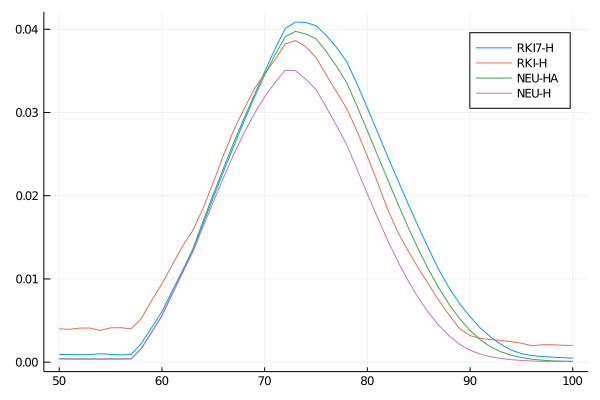

In [27]:
plot(rolling_mae_rki7.k[50:100], rolling_mae_rki7.moving_mae[50:100], label="RKI7-H")
plot!(rolling_mae_rki.k[50:100], rolling_mae_rki.moving_mae[50:100], label="RKI-H")
plot!(rolling_mae_neu_ha.k[50:100], rolling_mae_neu_ha.moving_mae[50:100], label="NEU-HA")
plot!(rolling_mae_neu_h.k[50:100], rolling_mae_neu_h.moving_mae[50:100], label="NEU-H")


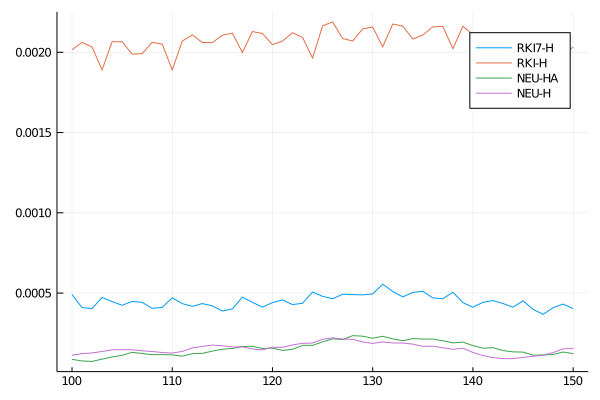

In [28]:
plot(rolling_mae_rki7.k[100:150], rolling_mae_rki7.moving_mae[100:150], label="RKI7-H")
plot!(rolling_mae_rki.k[100:150], rolling_mae_rki.moving_mae[100:150], label="RKI-H")
plot!(rolling_mae_neu_ha.k[100:150], rolling_mae_neu_ha.moving_mae[100:150], label="NEU-HA")
plot!(rolling_mae_neu_h.k[100:150], rolling_mae_neu_h.moving_mae[100:150], label="NEU-H")


In [29]:
result = parameter_search(df, collect(1:4), collect(1:4),  collect(4:4), "delayed")
result

,NEUH,NEUHA,Past,Future,k_gen
,Float64,Float64,Int64,Int64,Int64
1,0.0860369,0.389394,1,1,4
2,0.0900189,0.294698,1,2,4
3,0.0924517,0.228293,1,3,4
4,0.0908956,0.0971653,1,4,4
5,0.0977536,0.419893,2,1,4
6,0.100298,0.304033,2,2,4
7,0.0988454,0.170962,2,3,4
8,0.0957258,0.0683708,2,4,4
9,0.108542,0.370827,3,1,4
